## Homework #7.1 - Decision Tree

### Overview:
As you probably already learned, Decision Trees are very powerful
and, at the same time, easy-to-understand Machine Learning algorithms.
Doing this homework, you will train a couple of Decision tree algorithms
and will try to dive deeper into how it works.

### Task:
In this task, we invite you to train 2 models on a selected Data Set that
should predict the class column. The models are the following:
* Let’s, of course, start with importing the Data Set.
* The next thing you will do is create a visualization of the algorithm’s
decision boundaries to understand better how it works.
    * Choose 2 features of the Data Set with the highest absolute correlation with the target.
    * Create the decision boundary graph of these features related to the target.
    * Comment on the result that you got.

    PS: More about decision boundary you can find here: (https://bit.ly/3U7ICc7)

* Decision trees have a lot of hyperparameters. Let’s explore how they
influence the accuracy of the model. For every hyperparameter in this
list, create a line plot where on the X-axis are hyperparameter values and
on the Y-axis is the accuracy of the model for different hyperparameter
settings:
    * max depth
    * min samples split
    * min samples leaf
    * min weight fraction leaf
    * max features
    * max leaf nodes
    * min impurity decrease

    P.S. Always set random state the same.

* Comment on the impact of every hyperparameter on the model’s
accuracy.
* Train a model with the best set of hyperparameters, then export
the tree’s structure.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from numpy import arange, meshgrid, hstack
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
heart_disease_dataset: pd.DataFrame = pd.read_csv('dataset/heart.csv')

In [3]:
heart_disease_dataset.head(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
heart_disease_dataset.tail(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
heart_disease_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


As it may be observed, no Null values are present in this dataset, which will help me avoid the manipulations with imputation of those missing values.

In [6]:
corr_matrix = heart_disease_dataset.corr()
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


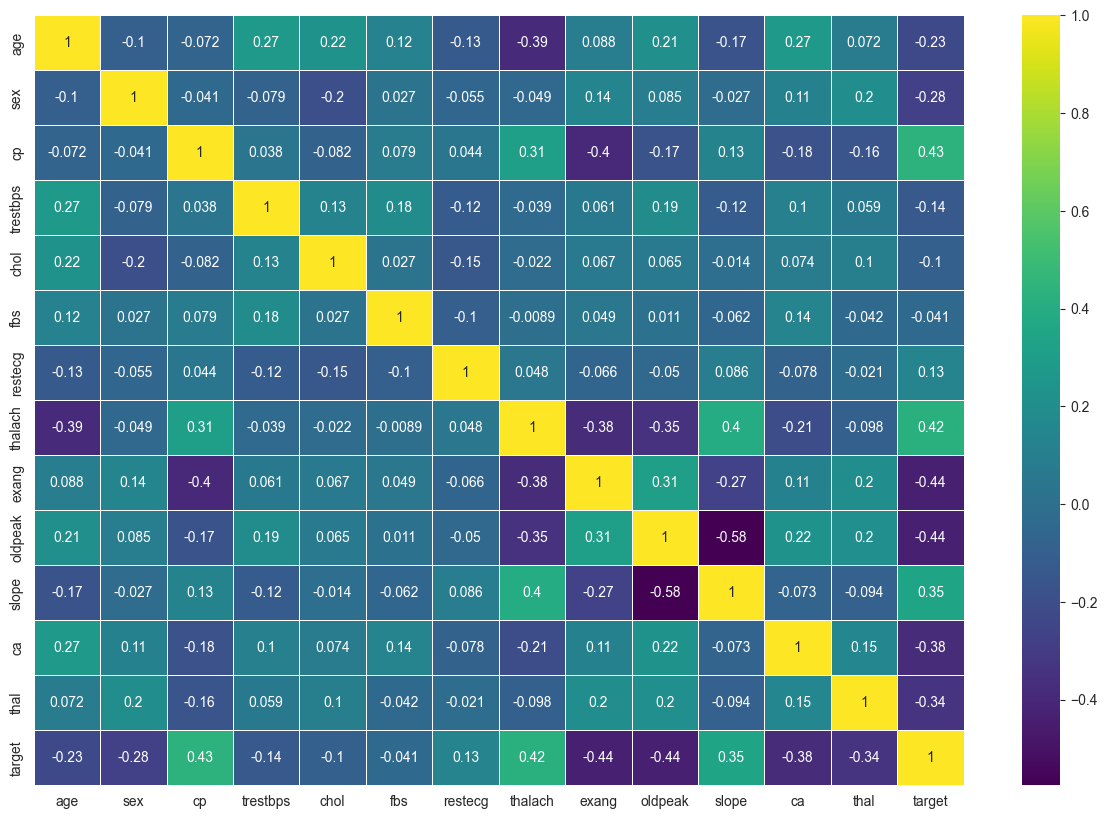

In [7]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=corr_matrix, annot=True, linewidths=0.5, cbar=True, cmap='viridis')
plt.show()

In [8]:
sorted_corr_matrix: pd.Series = corr_matrix['target'].abs().sort_values(ascending=False)
sorted_corr_matrix

target      1.000000
oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
Name: target, dtype: float64

In [9]:
selected_columns = sorted_corr_matrix.index[1:3].union(['target'])
# selected_columns = sorted_corr_matrix.index.intersection(['thalach', 'oldpeak']).union(['target']) x=0 y=2 target_column=1

selected_columns

Index(['exang', 'oldpeak', 'target'], dtype='object')

In [10]:
visualization_heart_disease_dataset = heart_disease_dataset[selected_columns]
visualization_heart_disease_dataset

,exang,oldpeak,target
0,0,1.0,0
1,1,3.1,0
2,1,2.6,0
3,0,0.0,0
4,0,1.9,0
...,...,...,...
1020,1,0.0,1
1021,1,2.8,0
1022,1,1.0,0
1023,0,0.0,1


In [11]:
visualization_X_features = visualization_heart_disease_dataset.drop(columns=['target'])
visualization_X_features

,exang,oldpeak
0,0,1.0
1,1,3.1
2,1,2.6
3,0,0.0
4,0,1.9
...,...,...
1020,1,0.0
1021,1,2.8
1022,1,1.0
1023,0,0.0


In [12]:
visualization_y_target = visualization_heart_disease_dataset['target']
visualization_y_target

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

<Axes: xlabel='oldpeak', ylabel='Proportion'>

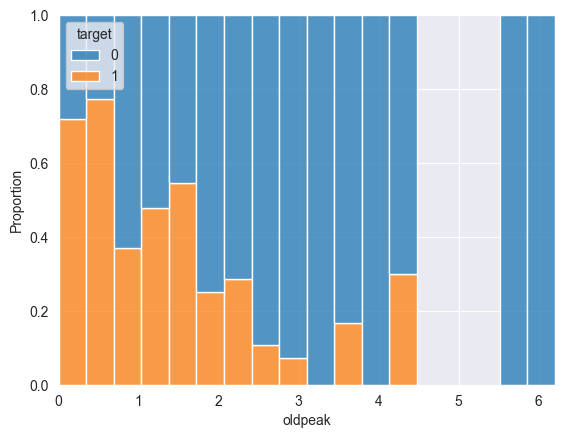

In [13]:
sns.histplot(data=visualization_heart_disease_dataset, x=selected_columns[1], hue=selected_columns[2], stat="proportion", multiple="fill")

<Axes: xlabel='exang', ylabel='Proportion'>

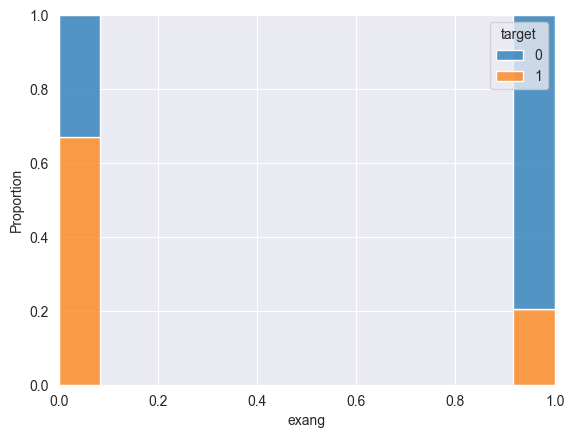

In [14]:
sns.histplot(data=visualization_heart_disease_dataset, x=selected_columns[0], hue=selected_columns[2], stat="proportion", multiple="fill")

<Axes: xlabel='exang', ylabel='oldpeak'>

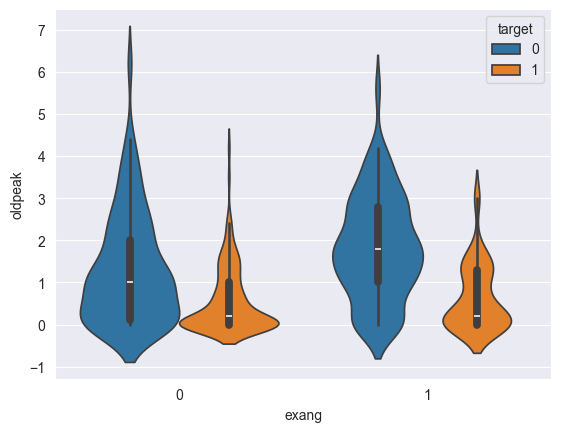

In [15]:
sns.violinplot(data=visualization_heart_disease_dataset, x=selected_columns[0], y=selected_columns[1], hue=selected_columns[2])

<Axes: xlabel='exang', ylabel='Density'>

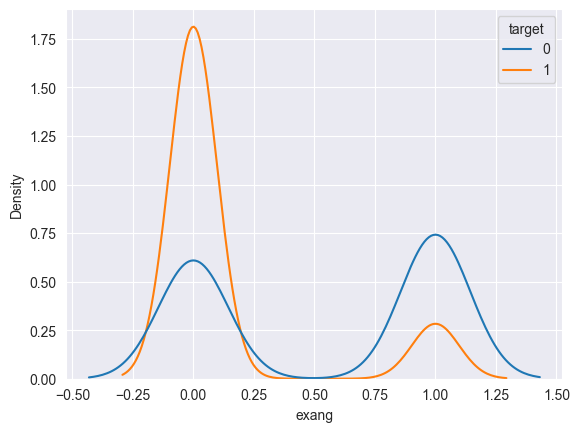

In [16]:
sns.kdeplot(data=visualization_heart_disease_dataset, x=selected_columns[0], hue=selected_columns[2])

<Axes: xlabel='oldpeak', ylabel='Density'>

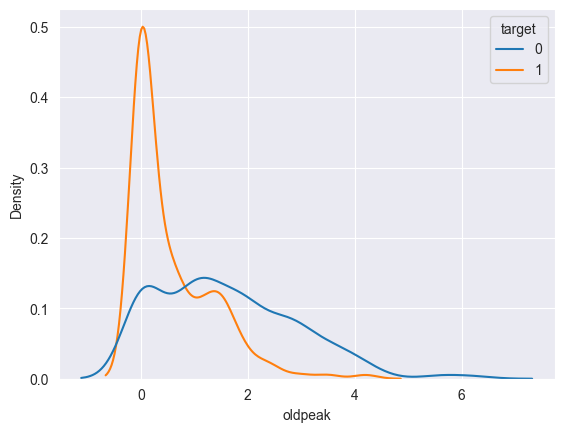

In [17]:
sns.kdeplot(data=visualization_heart_disease_dataset, x=selected_columns[1], hue=selected_columns[2])

In order to find a decision boundary, I will follow the suggestions from the SMLH and use Logistic Regression Model and Decision Tree fit on the subset of the data containing 2 feature
and the target.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(visualization_heart_disease_dataset.drop(['target'], axis=1), visualization_y_target, test_size=0.3,random_state=42)

In [19]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X=X_train, y=y_train)

LogisticRegression()

In [20]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X=X_train, y=y_train)

DecisionTreeClassifier()

In [21]:
log_reg_y_hat = logistic_regression_model.predict(X=X_test)
dec_tree_y_hat = decision_tree_model.predict(X=X_test)

In [22]:
log_reg_acc = accuracy_score(y_true=y_test, y_pred=log_reg_y_hat)
print('Logistic Regression Accuracy: %.5f' % log_reg_acc)
dec_tree_acc = accuracy_score(y_true=y_test, y_pred=dec_tree_y_hat)
print('Decision Tree Accuracy: %.5f' % dec_tree_acc)

Logistic Regression Accuracy: 0.76948
Decision Tree Accuracy: 0.75974


In [23]:
min1, max1 = visualization_X_features[selected_columns[0]].min()-1, visualization_X_features[selected_columns[0]].max()+1
min2, max2 = visualization_X_features[selected_columns[1]].min()-1, visualization_X_features[selected_columns[1]].max()+1
# min2, max2 = visualization_X_features[selected_columns[2]].min()-1, visualization_X_features[selected_columns[2]].max()+1

In [24]:
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)

In [25]:
xx, yy = meshgrid(x1grid, x2grid)

In [26]:
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

In [27]:
grid = hstack((r1,r2))

In [28]:
log_reg_yy_hat = logistic_regression_model.predict(grid)
dec_tree_yy_hat = decision_tree_model.predict(grid)

D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
D:\Programming\Projects\Sigmoid\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [29]:
log_reg_zz = log_reg_yy_hat.reshape(xx.shape)
dec_tree_zz = dec_tree_yy_hat.reshape(xx.shape)

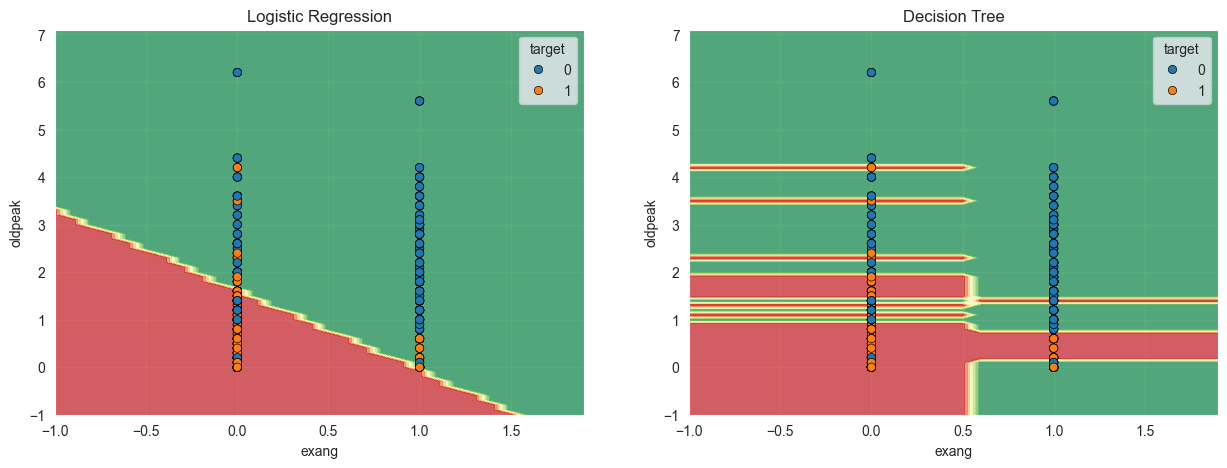

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].contourf(xx, yy, log_reg_zz, cmap='RdYlGn_r', alpha=0.7)
ax[0].set_title('Logistic Regression')

ax[1].contourf(xx, yy, dec_tree_zz, cmap='RdYlGn_r', alpha=0.7)
ax[1].set_title('Decision Tree')

for i in range(2):
    ax[i].set_xlabel(selected_columns[0])
    ax[i].set_ylabel(selected_columns[1])
    # ax[i].set_ylabel(selected_columns[2])
    sns.scatterplot(x=selected_columns[0], y=selected_columns[1], hue=selected_columns[2], data=visualization_heart_disease_dataset, edgecolor='k', ax=ax[i])
    # sns.scatterplot(x=selected_columns[0], y=selected_columns[2], hue=selected_columns[1], data=visualization_heart_disease_dataset, edgecolor='k', ax=ax[i])

plt.show()

As it may be seen, Decision Tree gives a better decision boundary than classical Logistic Regression model. However, the accuracy score is lower. I tested with other - numerical, features and got a better accuracy score for Decision Tree. As a conclusion on the plots, people that have exercise induced angina are less likely to have a heart disease, but mainly, people that have lower ST depression induced by exercise relative to rest are more likely to have the disease.

Logistic Regression gives us a linear decision boundary, whereas the Decision Tree gives a non-linear boundary, which is probably the issue with selected columns, since one of them is numerical and other is binary.


In [31]:
def evaluate_hyperparameter(result_dict, best_dict, hyperparameter_name, hyperparameter_values, X_train, y_train, X_test, y_test):
    best_accuracy = 0
    best_hyperparameter_value = None

    for param_value in hyperparameter_values:
        dec_tree_cls = DecisionTreeClassifier(**{hyperparameter_name: param_value}, random_state=42)
        dec_tree_cls.fit(X=X_train, y=y_train)
        y_hat = dec_tree_cls.predict(X=X_test)
        accuracy = accuracy_score(y_true=y_test, y_pred=y_hat)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_hyperparameter_value = param_value

        if hyperparameter_name not in result_dict:
            result_dict[hyperparameter_name] = {'values': [], 'accuracies': []}

        result_dict[hyperparameter_name]['values'].append(param_value)
        result_dict[hyperparameter_name]['accuracies'].append(accuracy)

    best_dict[hyperparameter_name] = best_hyperparameter_value

In [32]:
hyperparameters = {
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'min_weight_fraction_leaf': np.linspace(0.0, 0.5, 20),
    'max_features': ['sqrt', 'log2'] + list(np.arange(1, 20)),
    'max_leaf_nodes': np.arange(2, 21),
    'min_impurity_decrease': np.linspace(0.0, 0.5, 20)
}

<Figure size 1500x1000 with 0 Axes>

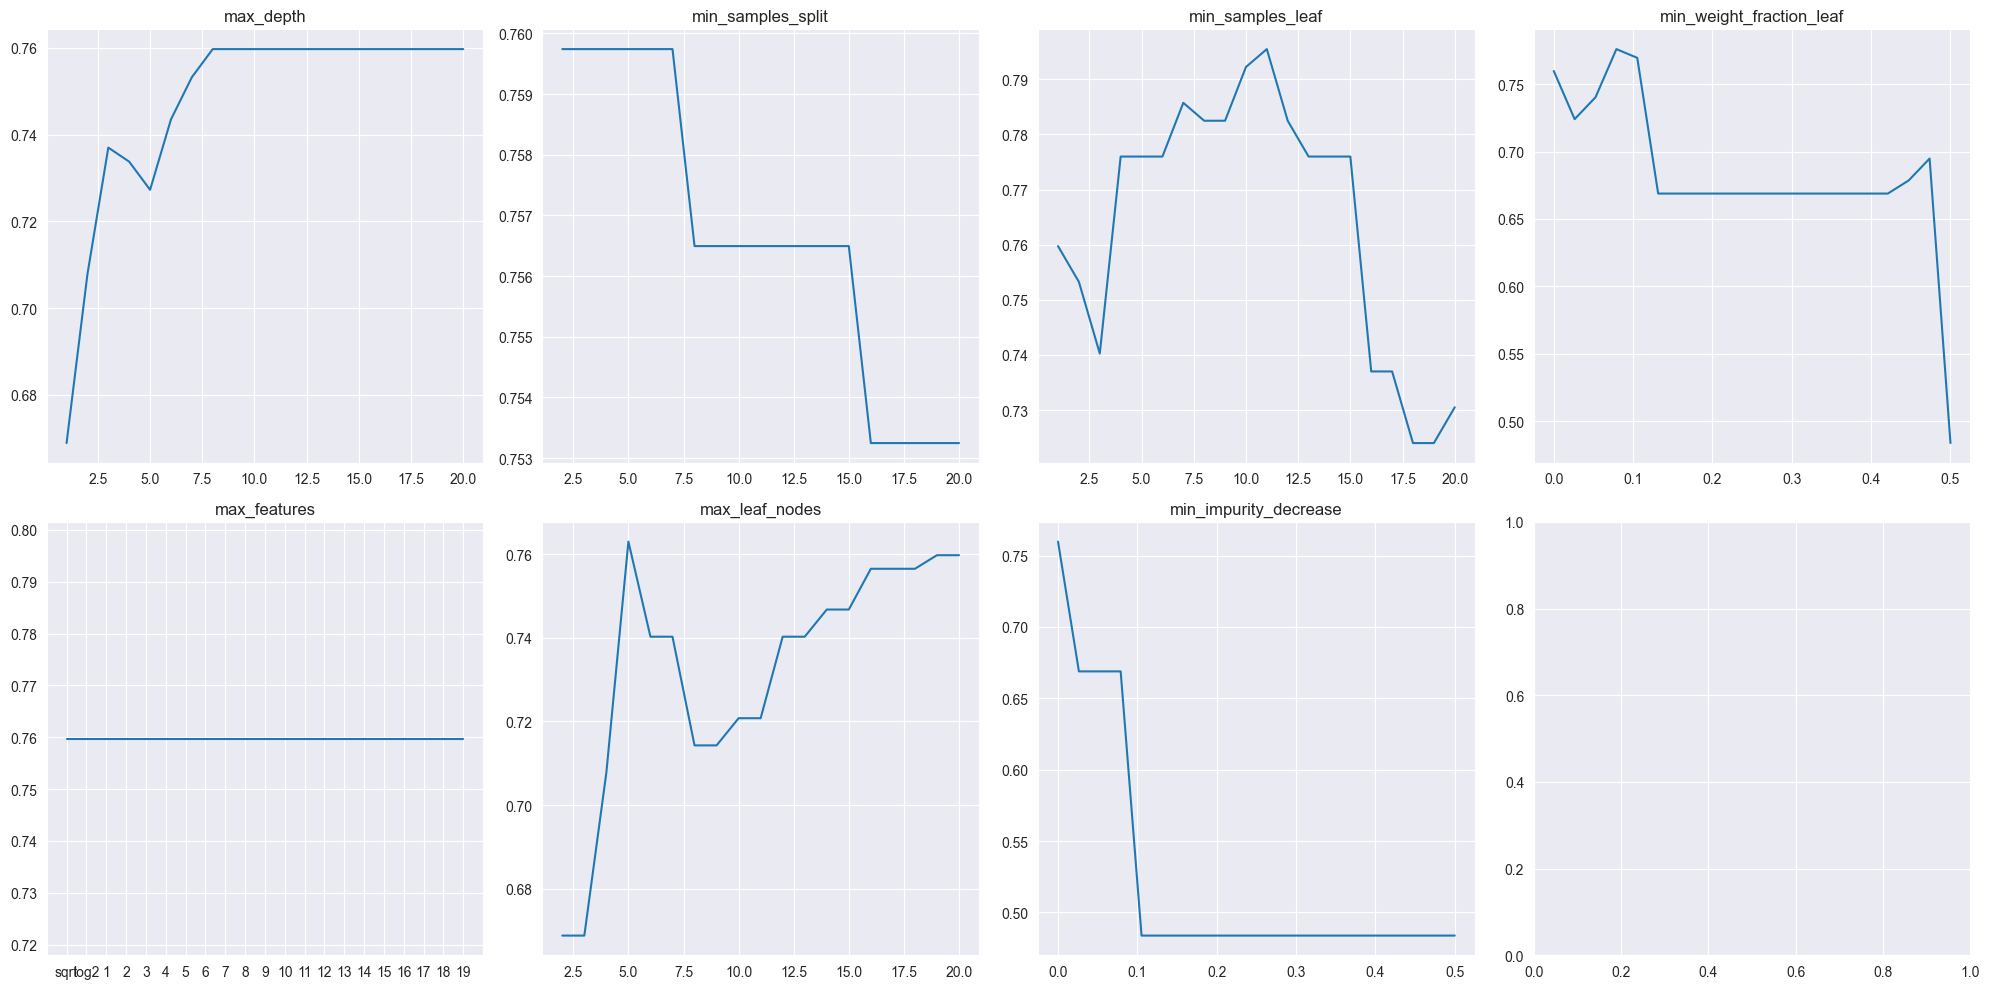

In [33]:
plt.figure(figsize=(15, 10))

result_dict = {}
best_dict = {}

for i, (hyperparameter_name, hyperparameter_values) in enumerate(hyperparameters.items(), 1):
    evaluate_hyperparameter(result_dict, best_dict, hyperparameter_name, hyperparameter_values, X_train, y_train, X_test, y_test)

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()
for i, hyperparameter in enumerate(hyperparameters):
    values = result_dict[hyperparameter]['values']
    accuracy = result_dict[hyperparameter]['accuracies']
    axes[i].plot(values, accuracy)
    axes[i].set_title(hyperparameter)

plt.tight_layout()
plt.show()

In [34]:
best_dict

{'max_depth': np.int64(8),
 'min_samples_split': np.int64(2),
 'min_samples_leaf': np.int64(11),
 'min_weight_fraction_leaf': np.float64(0.07894736842105263),
 'max_features': 'sqrt',
 'max_leaf_nodes': np.int64(5),
 'min_impurity_decrease': np.float64(0.0)}

Now, I can identify the best hyperparameters to use in the training of the Decision Tree:
1. max_depth = 8 - is the parameter that shows the maximum depth of the tree. In other words, it is the number of edges in the tree from the root to the deepest node. In my case, optimal maximum depth is 8.
2. min_samples_split = 2 - is the hyperparameter that specifies the minimum number of samples required to split an internal node. In other words, if the amount of samples in the internal node is higher than 2, in my case, this node can be split further, otherwise, it becomes a leaf.
3. min_samples_leaf = 11 - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. In other words, it will specify the minimum number of samples to be in a leaf node.
4. min_weight_fraction_leaf = 0.0789 - is the parameter that specifies the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. In other words, each leaf node must contain at least, in my case, 0.0789 of the total weight of the samples.
5. max_features = sqrt - is the parameter that shows the number of features to consider when looking for the best split. By documentation of Scikit-learn, it may take int, float, 'sqrt' and 'log2' data types. In my case, model will look at $max\_features = sqrt(n\_features)$. In other words, per each split, it will take in consideration $sqrt(n\_features)$ features.
6. max_leaf_nodes = 5 - is the parameter that specifies the maximum number of leaf nodes. In my case, tree will end up with maximum 5 leaf nodes.
7. min_impurity_decrease = 0 - is the parameter that specifies the threshold at which a node will be split if this split induces a decrease of the impurity greater than or equal to this value, in my case 0, which means that a split will happen if impurity reduction is higher than 0, which is always.

In [35]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X=X_train, y=y_train)
y_hat = decision_tree_model.predict(X=X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_hat)
print(f"Accuracy score with default hyperparameters: {accuracy}")

Accuracy score with default hyperparameters: 0.7597402597402597


In [36]:
decision_tree_model_manual_params = DecisionTreeClassifier(random_state=42, **best_dict)
decision_tree_model_manual_params.fit(X=X_train, y=y_train)
y_hat = decision_tree_model_manual_params.predict(X=X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_hat)
print(f"Accuracy score with selected best hyperparameters: {accuracy}")

Accuracy score with selected best hyperparameters: 0.75


In [37]:
# Drop max_features
best_dict['max_features'] = None

In [38]:
decision_tree_model_manual_params = DecisionTreeClassifier(random_state=42, **best_dict)
decision_tree_model_manual_params.fit(X=X_train, y=y_train)
y_hat = decision_tree_model_manual_params.predict(X=X_test)
accuracy = accuracy_score(y_true=y_test, y_pred=y_hat)
print(f"Accuracy score with selected best hyperparameters: {accuracy}")

Accuracy score with selected best hyperparameters: 0.775974025974026


As a result, I observed that both DTs are working at around 0.76 and 0.75 accuracy, and I decided to use default value for $max\_features$ in order to observe how it will behave, since its impact is not very clear on the plot, and obtained a slightly better result of 0.776 accuracy score.

In [39]:
from sklearn import tree

tree.export_graphviz(decision_tree_model_manual_params,
                     out_file='tree_images/manual_selected_params_decision_tree.dot',
                     feature_names=X_train.columns,
                     class_names=y_train.unique().astype(str),
                     filled=True,
                     leaves_parallel=True,
                     proportion=True,
                     rounded=True)


In [40]:
import pydot

(graph,) = pydot.graph_from_dot_file('tree_images/manual_selected_params_decision_tree.dot')
graph.write_png('tree_images/manual_selected_params_decision_tree.png')

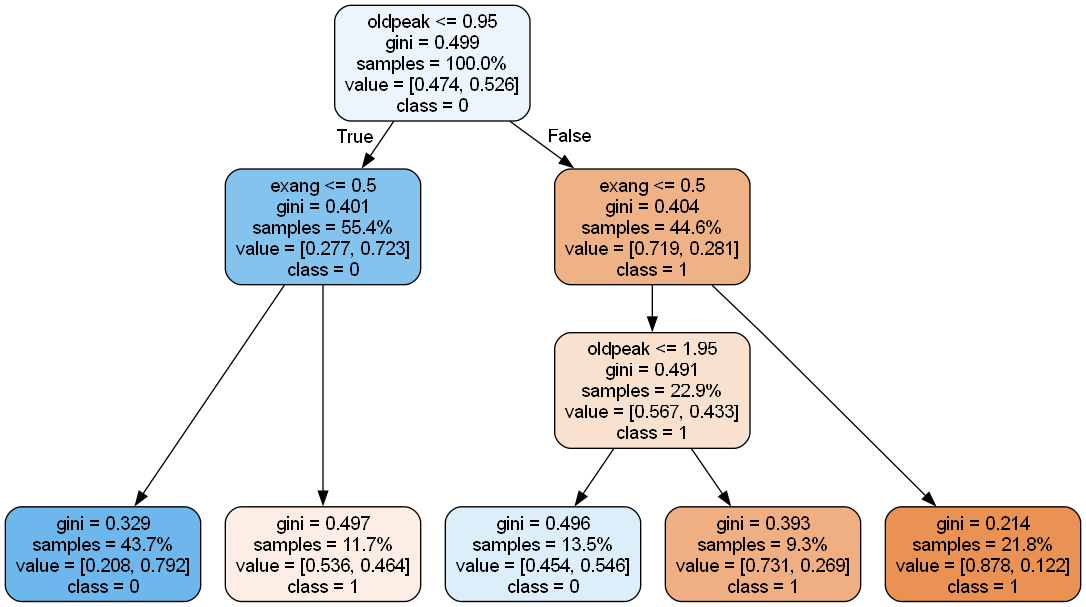

In [41]:
from IPython.display import Image

Image(filename='tree_images/manual_selected_params_decision_tree.png')